In [1]:
# Import important Libraries
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pylab as plt

from sklearn.cross_validation import cross_val_score, time
from sklearn.model_selection import TimeSeriesSplit
# Ignore warnings (this isn't a good practice usually)
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### read data into a dataframe 

In [2]:
data = pd.read_csv('data/AvacadosPricePred/avocado.csv')

In [3]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
cols = data.columns

In [5]:

data.columns = cols

In [6]:
data.set_index('Date',inplace=True)

In [7]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
VolByReg = data.groupby(by='region')['Total Volume'].sum()

In [9]:
VolByReg

region
Albany                 1.606780e+07
Atlanta                8.860512e+07
BaltimoreWashington    1.347139e+08
Boise                  1.441319e+07
Boston                 9.727398e+07
BuffaloRochester       2.296247e+07
California             1.028982e+09
Charlotte              3.555554e+07
Chicago                1.337023e+08
CincinnatiDayton       4.452201e+07
Columbus               2.999336e+07
DallasFtWorth          2.084193e+08
Denver                 1.389025e+08
Detroit                6.342242e+07
GrandRapids            3.021174e+07
GreatLakes             5.896425e+08
HarrisburgScranton     4.180886e+07
HartfordSpringfield    5.067054e+07
Houston                2.031679e+08
Indianapolis           3.026339e+07
Jacksonville           2.879000e+07
LasVegas               5.437691e+07
LosAngeles             5.078965e+08
Louisville             1.609700e+07
MiamiFtLauderdale      9.767322e+07
Midsouth               5.083494e+08
Nashville              3.561209e+07
NewOrleansMobile     

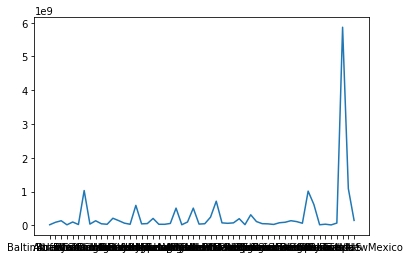

In [10]:
plt.plot(VolByReg.index, VolByReg.values)

In [11]:
Top10RegVol = VolByReg.sort_values(ascending=False).head(10)

In [12]:
Top10RegVol = pd.DataFrame(Top10RegVol).T

In [13]:
Top10RegVol[Top10RegVol.columns[1:]]

region,West,California,SouthCentral,Northeast,Southeast,GreatLakes,Midsouth,LosAngeles,Plains
Total Volume,1.086779e+09,1.028982e+09,1.011280e+09,7.132809e+08,6.152384e+08,5.896425e+08,508349357.2,5.078965e+08,3.111885e+08


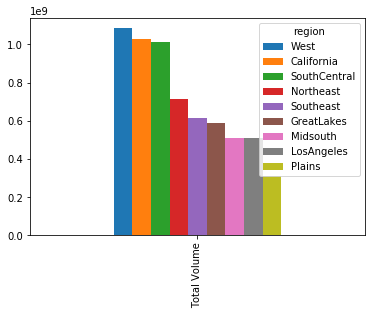

In [14]:
Top10RegVol[Top10RegVol.columns[1:]].plot(kind='bar')

In [15]:
Low10RegVol = pd.DataFrame(VolByReg.sort_values())

In [16]:
Low10RegVol = Low10RegVol.head(10).T

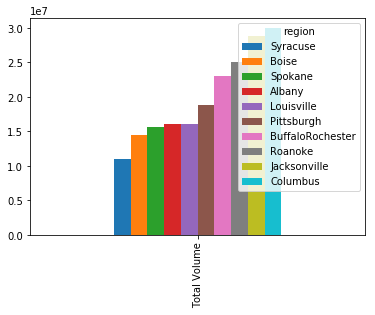

In [17]:
Low10RegVol.plot(kind='Bar')

In [18]:
VolbyYear = data.groupby(by='year')['Total Volume'].sum()

In [19]:
VolbyYear = pd.DataFrame(VolbyYear.sort_values(ascending=True)).T

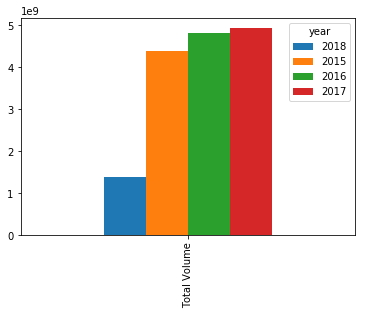

In [20]:
VolbyYear.plot(kind='bar')

In [21]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [22]:
AvgPriceRegion = data.groupby(by=data.region)['AveragePrice'].mean()
GREEN_COLORMAP = sns.color_palette("Greens")
BLUE_COLORMAP = sns.color_palette("RdBu")
BLUE_COLORMAP

[(0.7561707035755478, 0.21038062283737025, 0.22352941176470587),
 (0.940715109573241, 0.6099192618223759, 0.4812764321414839),
 (0.9856978085351787, 0.8889657823913879, 0.8320645905420992),
 (0.8605151864667436, 0.9174163783160324, 0.9487120338331411),
 (0.530026912725875, 0.7456362937331797, 0.8560553633217994),
 (0.1843137254901961, 0.47266435986159167, 0.7116493656286044)]

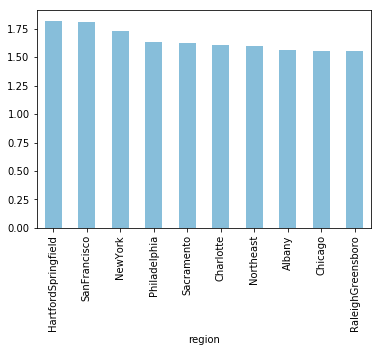

In [23]:
AvgPriceRegion.sort_values(ascending=False).head(10).plot(kind='bar',color=BLUE_COLORMAP[-2])

In [24]:
AvgPriceYear = data.groupby(by=data.year)['AveragePrice'].mean()

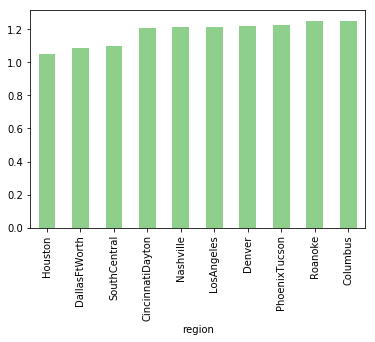

In [25]:
AvgPriceRegion.sort_values().head(10).plot(kind='bar', color=GREEN_COLORMAP[2])

In [26]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [27]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


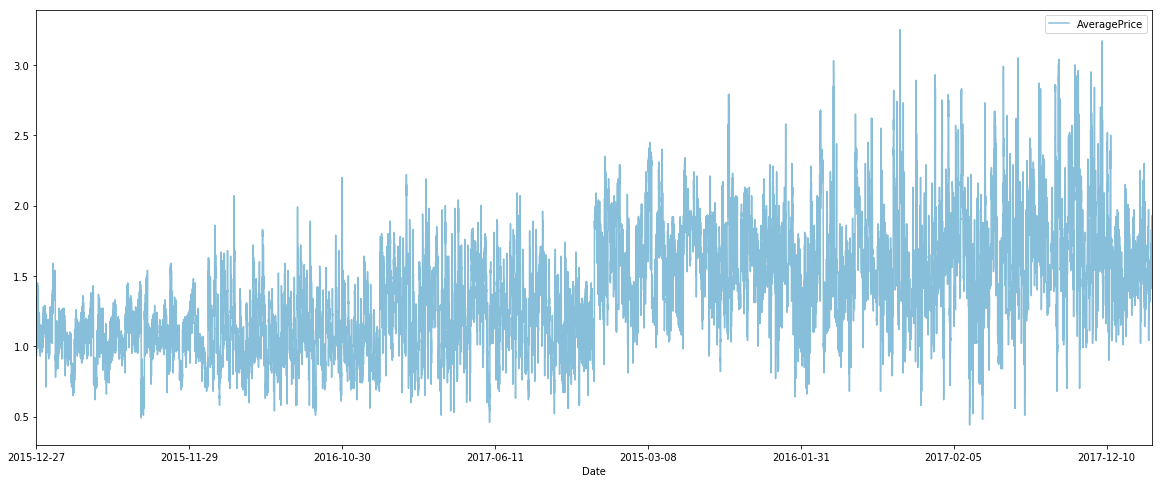

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
data.plot(y='AveragePrice', ax=ax, color=BLUE_COLORMAP[-2])

In [29]:
AvgPriceYear.plot(y='AveragePrice', ax=ax, color=BLUE_COLORMAP[-2])

In [30]:
AvgPriceYear = pd.DataFrame(AvgPriceYear)

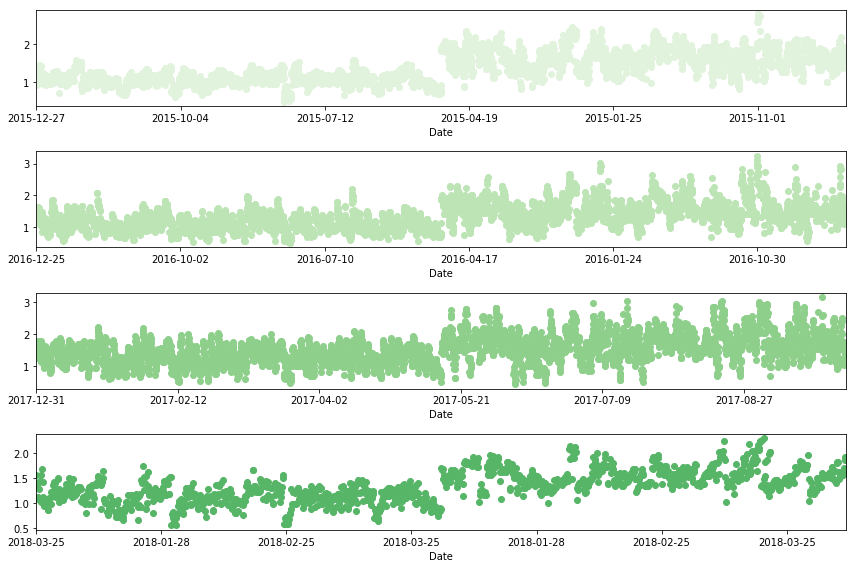

In [31]:
years = data.year.unique()
number_years = len(years)
fig, axes = plt.subplots(number_years, 1, figsize=(12, 8))
for i, year in enumerate(years):
    # One green shade per year :)
    # Also, no line connecting the points and marker set to a dot
    # for enhanced readability.
    (data[data.year==year].plot(y='AveragePrice', ax=axes[i], color=GREEN_COLORMAP[i],
             marker="o", linestyle=""))
    axes[i].legend_.remove()

fig.set_tight_layout("tight")

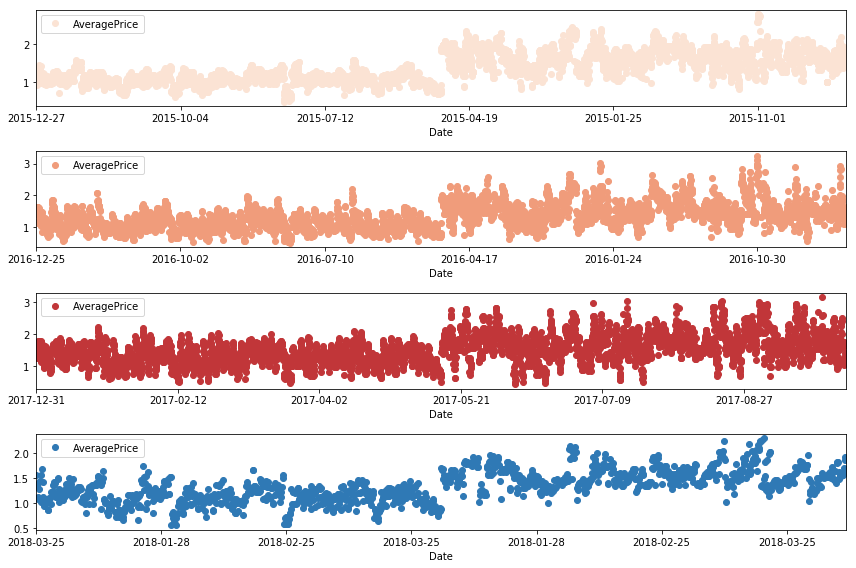

In [32]:
fig, axes = plt.subplots(number_years, 1, figsize=(12, 8))
for i, year in enumerate(data.year.unique()):
    data[data.year==year].plot(y='AveragePrice', ax=axes[i], color= BLUE_COLORMAP[-i+2],
                               marker='o',linestyle="")
    

fig.set_tight_layout(True)

In [33]:
data.drop(data.columns[0], inplace=True)

In [34]:
data['Date'] = data.index

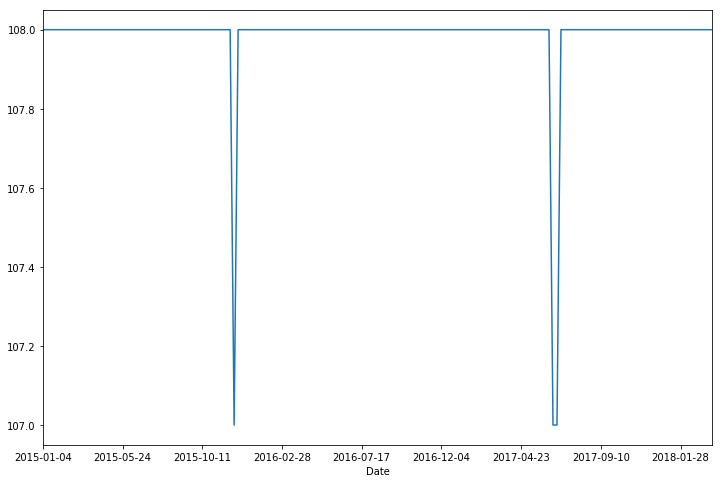

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
data.groupby('Date').size().plot(ax=ax)

In [36]:
pd.to_datetime(data.Date)
data.dtypes

Unnamed: 0        int64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
Date             object
dtype: object

In [37]:
data['Date'] = data.Date.apply(lambda x: pd.to_datetime(x))

In [38]:
data.Date.diff().head()

Date
2015-12-27       NaT
2015-12-20   -7 days
2015-12-13   -7 days
2015-12-06   -7 days
2015-11-29   -7 days
Name: Date, dtype: timedelta64[ns]

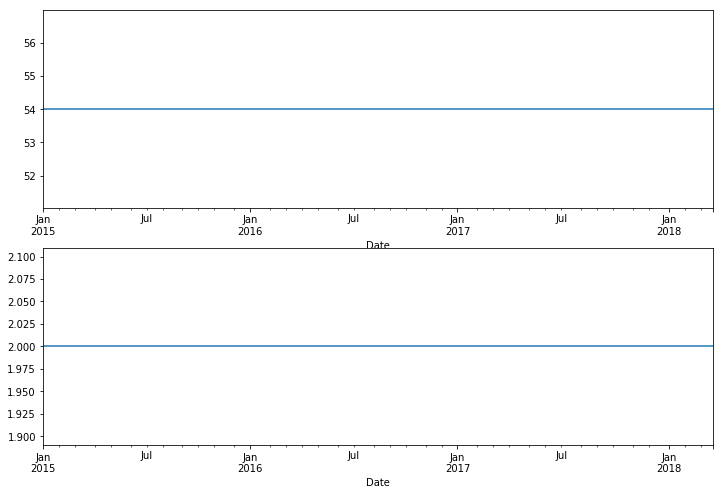

In [39]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
data.groupby('Date')['region'].nunique().plot(ax=axes[0])
data.groupby('Date')['type'].nunique().plot(ax=axes[1])

In [40]:
VolByTyp= data.groupby('type')['Total Volume'].count()


In [41]:
VolByTyp.head()

type
conventional    9126
organic         9123
Name: Total Volume, dtype: int64

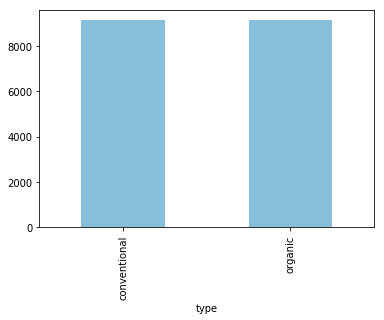

In [42]:
VolByTyp.plot(kind='bar', color=BLUE_COLORMAP[-2])

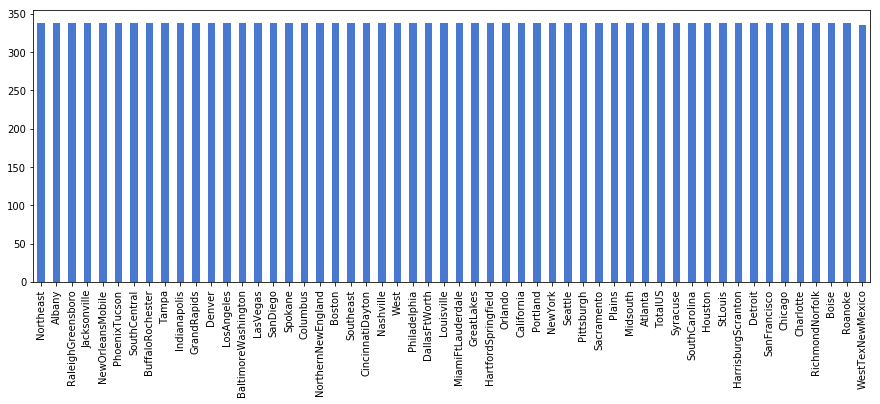

In [43]:
f, axes = plt.subplots(1,1,figsize=(15,5))
data.region.value_counts().plot(kind='bar', color= sns.color_palette("muted"))

###  Time-series processing

In [44]:
ts = data.groupby('Date')['AveragePrice'].mean().reset_index()

In [45]:
ts.head(10)

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037
5,2015-02-08,1.310463
6,2015-02-15,1.387593
7,2015-02-22,1.362685
8,2015-03-01,1.311019
9,2015-03-08,1.360093


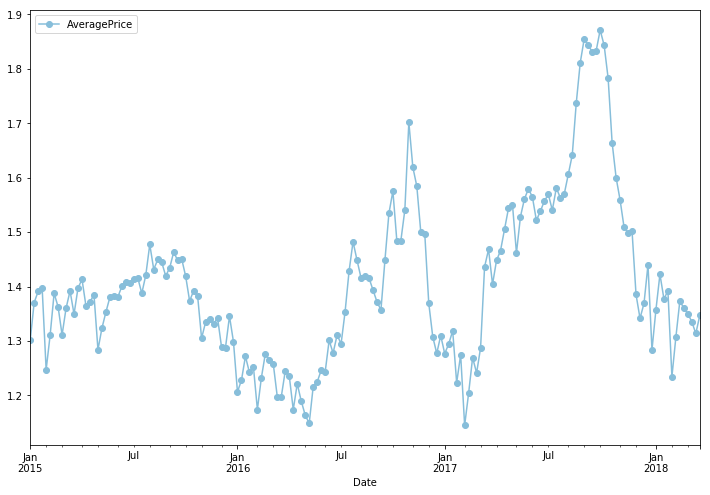

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ts.set_index('Date').plot(ax=ax, marker="o", linestyle="-", color=BLUE_COLORMAP[-2])

In [47]:
monthly = ts.set_index('Date').resample('1M').mean()

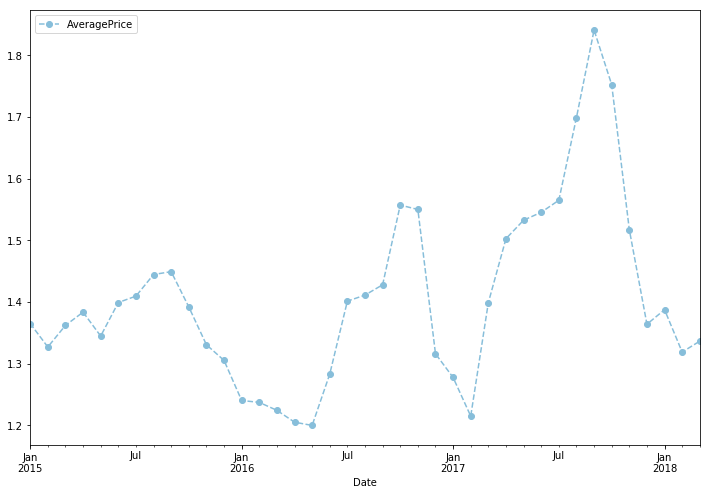

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
monthly.plot(ax=ax, marker="o", linestyle="--", color=BLUE_COLORMAP[-2])

In [49]:
monthly = monthly.assign(month = lambda x: x.index.month)

In [50]:
monthlyStats= monthly.groupby('month')['AveragePrice'].agg(['mean','median','std','min','max'])

In [51]:
import calendar  
monthlyStats['Month'] = monthlyStats.index

In [52]:
monthlyStats['Month'] = monthlyStats.Month.apply(lambda x: calendar.month_abbr[x])

In [53]:
monthlyStats

,mean,median,std,min,max,Month
month,,,,,,
1,1.317541,1.321273,0.070068,1.240185,1.387431,Jan
2,1.274387,1.277905,0.056768,1.214792,1.326944,Feb
3,1.330397,1.349220,0.075292,1.224213,1.398935,Mar
4,1.363694,1.383449,0.149774,1.205023,1.502611,Apr
5,1.359000,1.344685,0.166896,1.199722,1.532593,May
6,1.409179,1.399074,0.131467,1.283056,1.545406,Jun
7,1.458568,1.409444,0.092198,1.401333,1.564926,Jul
8,1.518184,1.444481,0.157442,1.411111,1.698958,Aug
9,1.572654,1.449144,0.232593,1.427870,1.840949,Sep


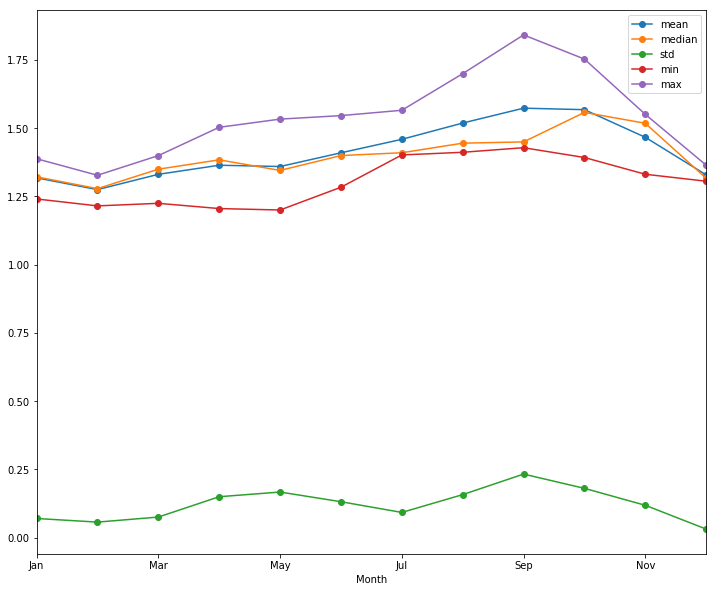

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10)) 
monthlyStats.set_index('Month').plot(ax=ax,marker="o")

 ### Temporal train/test split

In [55]:
# Renaming the ts DataFrame's columns (you will see why soon) before temporal split
renamed_ts = ts.rename(columns={"Date": "ds", "AveragePrice": "y"})
train_ts = renamed_ts.loc[lambda df: df['ds'].dt.year < 2018, :]
test_ts = renamed_ts.loc[lambda df: df['ds'].dt.year == 2018, :]

In [56]:
train_ts.head()

,ds,y
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037


In [57]:
train_ts.tail()

,ds,y
152,2017-12-03,1.385370
153,2017-12-10,1.341481
154,2017-12-17,1.368981
155,2017-12-24,1.439907
156,2017-12-31,1.283519


In [58]:
test_ts.head()

,ds,y
157,2018-01-07,1.357778
158,2018-01-14,1.422593
159,2018-01-21,1.377130
160,2018-01-28,1.392222
161,2018-02-04,1.234074


In [59]:
test_ts.tail()

,ds,y
164,2018-02-25,1.359630
165,2018-03-04,1.350185
166,2018-03-11,1.335093
167,2018-03-18,1.313704
168,2018-03-25,1.346852


In [60]:
ts.set_index('Date', inplace=True)

In [61]:
ts['2015'].shape

(52, 1)

### CHECKING THE STATIONARITY OF THE TIME SERIES

In [62]:
from statsmodels.tsa.stattools import adfuller

In [63]:
rollMean = pd.rolling_mean(ts,window=12)
rollStd  = pd.rolling_std(ts,window=12)

In [64]:
print(rollMean.tail())
print(rollStd.tail())

            AveragePrice
Date                    
2018-02-25      1.354869
2018-03-04      1.355594
2018-03-11      1.352770
2018-03-18      1.342253
2018-03-25      1.347531
            AveragePrice
Date                    
2018-02-25      0.057570
2018-03-04      0.057441
2018-03-11      0.057556
2018-03-18      0.051385
2018-03-25      0.047942


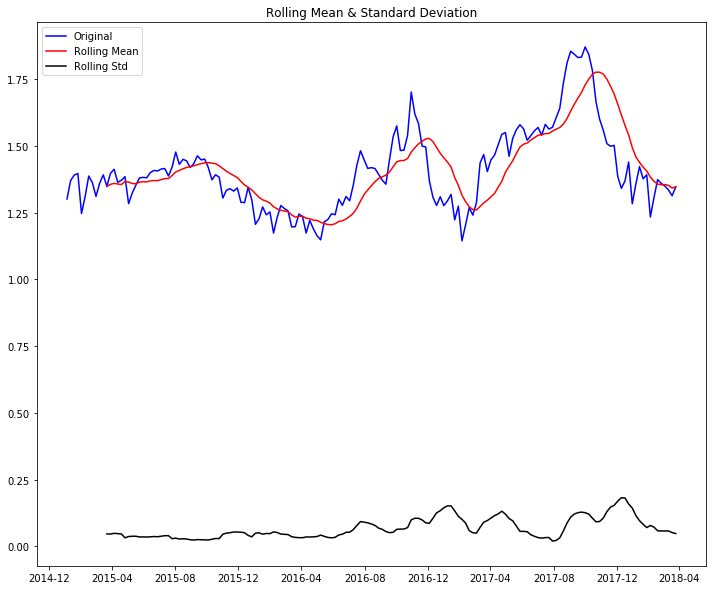

In [65]:
f, ax = plt.subplots(1, 1, figsize=(12, 10)) 
orig = plt.plot(ts, color='blue',label='Original')
mean = plt.plot(rollMean, color='red', label='Rolling Mean')
std = plt.plot(rollStd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [66]:
#Perform Dickey-Fuller test:
def dickeyFullerTest(ts):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)



In [67]:
dickeyFullerTest(ts.iloc[:,0].values)

Results of Dickey-Fuller Test:
Test Statistic                  -2.357817
p-value                          0.153998
#Lags Used                       0.000000
Number of Observations Used    168.000000
Critical Value (1%)             -3.469886
Critical Value (5%)             -2.878903
Critical Value (10%)            -2.576027
dtype: float64


In [68]:
ts_log = np.log(ts)
movingAvg = pd.rolling_mean(ts, window=12)
movingAvg = np.log(movingAvg)

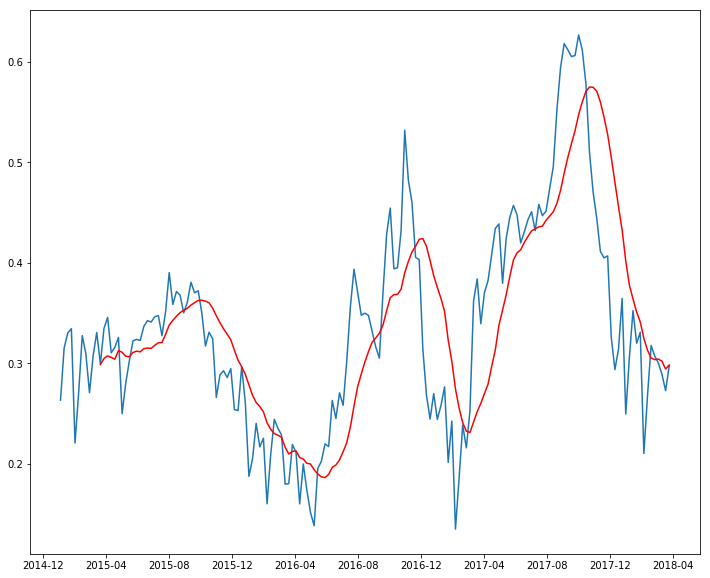

In [69]:
f, ax = plt.subplots(1, 1, figsize=(12, 10)) 
plt.plot(ts_log)
plt.plot(movingAvg,color='red')

In [70]:
ts_log_moving_diff = ts_log - movingAvg

In [71]:
ts_log_moving_diff.dropna(inplace=True)

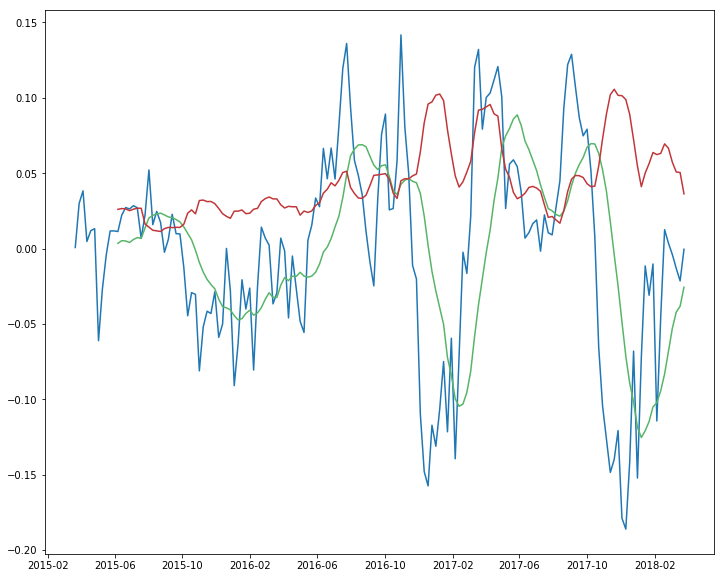

In [72]:
rollMean = pd.rolling_mean(ts_log_moving_diff, window=12)
rollStd = pd.rolling_std(ts_log_moving_diff, window=12)

f, ax = plt.subplots(1, 1, figsize=(12, 10)) 
plt.plot(ts_log_moving_diff)
plt.plot(rollMean, color=GREEN_COLORMAP[-3])
plt.plot(rollStd, color=BLUE_COLORMAP[0])

In [73]:
dickeyFullerTest(ts_log_moving_diff.iloc[:,0].values)

Results of Dickey-Fuller Test:
Test Statistic                  -4.338805
p-value                          0.000380
#Lags Used                       6.000000
Number of Observations Used    151.000000
Critical Value (1%)             -3.474416
Critical Value (5%)             -2.880878
Critical Value (10%)            -2.577081
dtype: float64


In [74]:
ts_log_diff = ts_log - ts_log.shift()

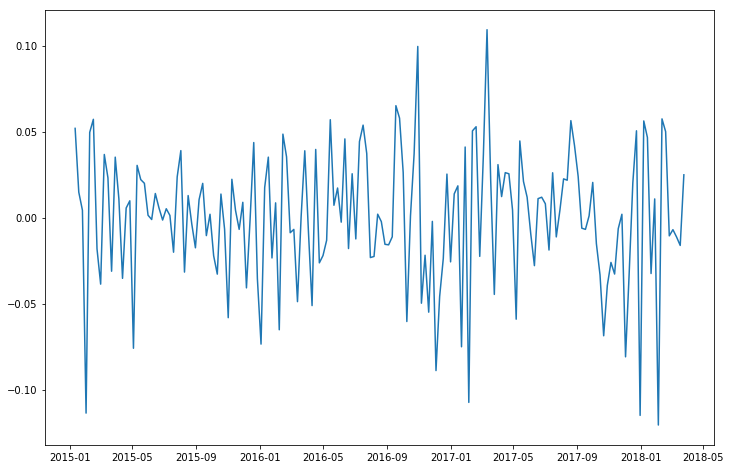

In [75]:
f, ax = plt.subplots(1,1, figsize=(12,8))
plt.plot(ts_log_diff)

In [76]:
ts_log_diff.dropna(inplace=True)

In [77]:
dickeyFullerTest(ts_log_diff.iloc[:,0].values)

Results of Dickey-Fuller Test:
Test Statistic                -1.381916e+01
p-value                        7.964466e-26
#Lags Used                     0.000000e+00
Number of Observations Used    1.670000e+02
Critical Value (1%)           -3.470126e+00
Critical Value (5%)           -2.879008e+00
Critical Value (10%)          -2.576083e+00
dtype: float64


In [78]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

In [79]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

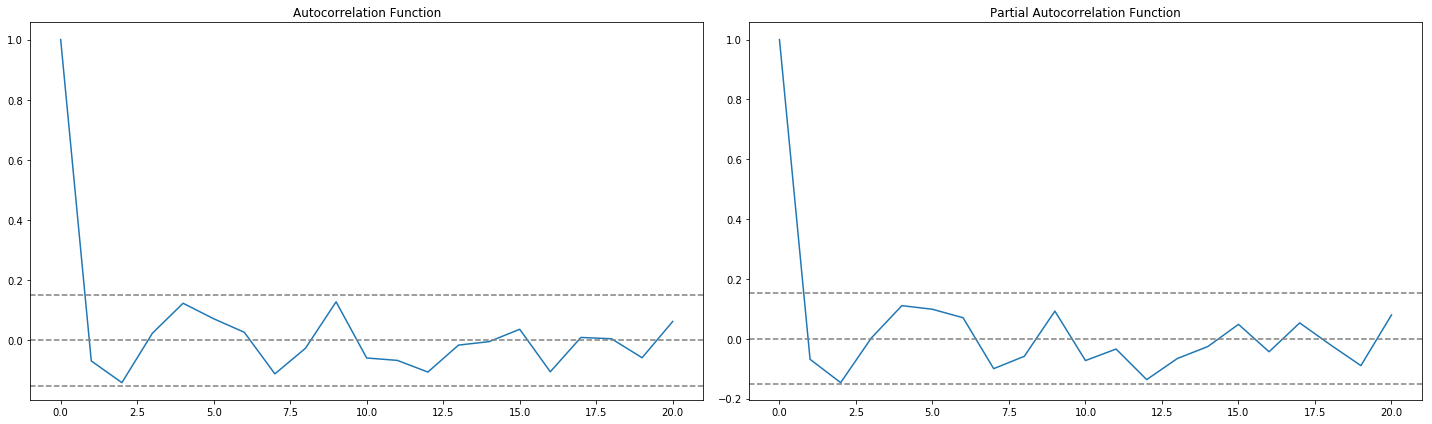

In [80]:
f,ax = plt.subplots(1,1, figsize=(20,6))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [81]:
def pltSize(rows, cols):
    f, ax = plt.subplots(rows,cols, figsize=(12,8))
    
    return f, ax 

In [82]:
print(ts_log_diff.shape)


(168, 1)


Text(0.5,1,'RSS: 0.3817')

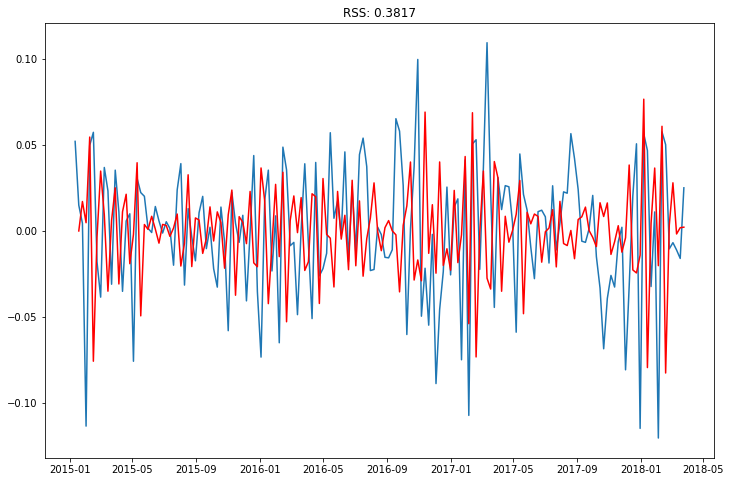

In [104]:
model = ARIMA(ts_log_diff, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
f, ax = plt.subplots(1,1, figsize=(12,8))


plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues.values- ts_log_diff[1:].AveragePrice.values)**2))

Text(0.5,1,'RSS: 0.4671')

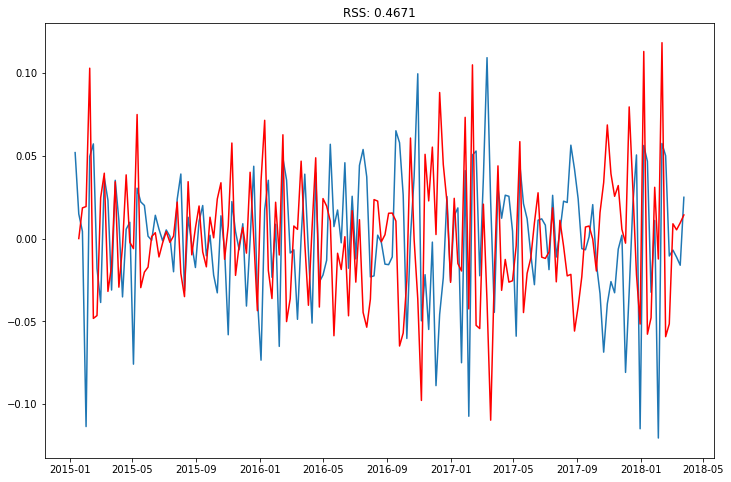

In [105]:
model = ARIMA(ts_log_diff, order=(0, 1, 1))  
f,ax = pltSize(1,1)
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues.values- ts_log_diff[1:].AveragePrice.values)**2))

Text(0.5,1,'RSS: 0.4984')

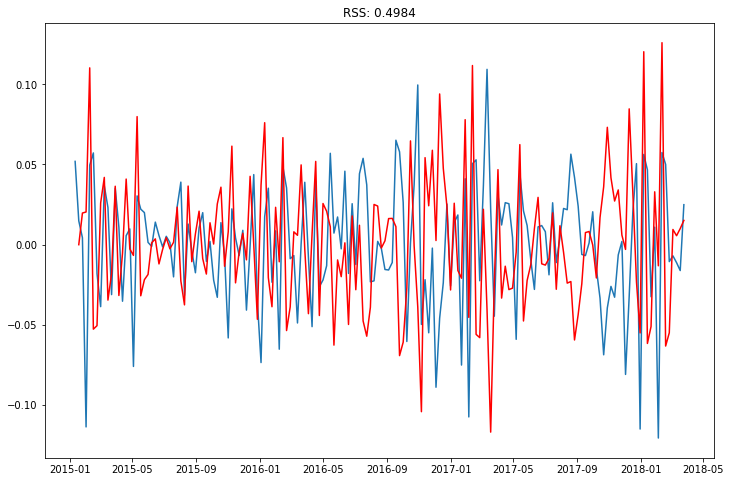

In [100]:
model = ARIMA(ts_log_diff, order=(1, 1, 1))  
f,ax = pltSize(1,1)
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues.values- ts_log_diff[1:].AveragePrice.values)**2))

### Forecasting 

In [139]:
from datetime import datetime
start_index = datetime(2017, 9, 3)
end_index = datetime(2018, 3, 25)
forecast = results_AR.predict(start=start_index, end=end_index)

In [140]:
ts_log_diff.tail(30).head()

,AveragePrice
Date,
2017-09-03,0.023993
2017-09-10,-0.006108
2017-09-17,-0.006802
2017-09-24,0.001061
2017-10-01,0.020496


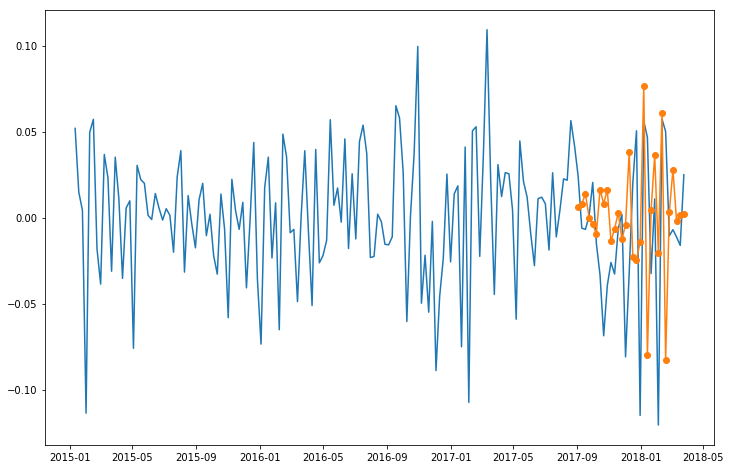

In [141]:
f, ax = pltSize(1,1)
plt.plot(ts_log_diff)
plt.plot(forecast, marker='o')

In [142]:
from sklearn.metrics import mean_squared_error 

In [143]:
mean_squared_error(ts_log_diff.AveragePrice[start_index:],forecast.values)

0.003033435194156102

In [147]:
model = ARIMA(ts, order=(1,0,0))
fitVal = model.fit(disp=3)

In [148]:
predVal = fitVal.predict()

In [149]:
error = mean_squared_error(ts, predVal)

In [150]:
error

0.0028328741838746746